## Preprocessing

In [47]:
 # Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay

# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Tensorflow
import tensorflow as tf

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [48]:
# # Import our dependencies
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# import pandas as pd
# import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [49]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
cols_to_drop = ["EIN", "NAME"]
application_df.drop(columns=cols_to_drop, inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [50]:
application_df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [51]:
# Determine the number of unique values in each column.
cols = ['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
        'IS_SUCCESSFUL']
for col in cols:
  print(col)
  print(application_df[col].nunique())
  print(application_df[col].value_counts())
  print()

APPLICATION_TYPE
17
APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

AFFILIATION
6
AFFILIATION
Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: count, dtype: int64

CLASSIFICATION
71
CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

USE_CASE
5
USE_CASE
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: count, dtype: int64

ORGANIZATION
4
ORGANIZATION
Trust           23515
Association     10255
Co-operative      486
Corporation  

In [52]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_df["APPLICATION_TYPE"].value_counts()

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [53]:
app_type_counts = application_df["APPLICATION_TYPE"].value_counts()
app_type_counts.loc[app_type_counts < 200].index.tolist()

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [54]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
threshold = 700
app_type_counts = application_df["APPLICATION_TYPE"].value_counts()
application_types_to_replace = app_type_counts.loc[app_type_counts < threshold].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: count, dtype: int64

In [55]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
application_df["CLASSIFICATION"].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [56]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_counts = application_df["CLASSIFICATION"].value_counts()
class_counts.loc[class_counts > 1]

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [57]:
class_counts = application_df["CLASSIFICATION"].value_counts()
class_counts.loc[class_counts < 500].index.tolist()

['C1700',
 'C4000',
 'C5000',
 'C1270',
 'C2700',
 'C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C1800',
 'C6000',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1235',
 'C1237',
 'C7210',
 'C2400',
 'C1720',
 'C4100',
 'C1257',
 'C1600',
 'C1260',
 'C2710',
 'C0',
 'C3200',
 'C1234',
 'C1246',
 'C1267',
 'C1256',
 'C2190',
 'C4200',
 'C2600',
 'C5200',
 'C1370',
 'C1248',
 'C6100',
 'C1820',
 'C1900',
 'C1236',
 'C3700',
 'C2570',
 'C1580',
 'C1245',
 'C2500',
 'C1570',
 'C1283',
 'C2380',
 'C1732',
 'C1728',
 'C2170',
 'C4120',
 'C8210',
 'C2561',
 'C4500',
 'C2150']

In [58]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
class_counts = application_df["CLASSIFICATION"].value_counts()
classifications_to_replace = class_counts.loc[class_counts < 500].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: count, dtype: int64

In [59]:
# Convert categorical data to numeric with `pd.get_dummies`
df = pd.get_dummies(application_df, dtype=int)
df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [60]:
# Split our preprocessed data into our features and target arrays
X = df.drop(columns=["IS_SUCCESSFUL"])
y = df.IS_SUCCESSFUL

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y) # stratify=True maintains target class percentages
print(X_train.shape, X_test.shape)

(25724, 43) (8575, 43)


In [61]:
len(X.columns)

43

In [62]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
# X_scaler = scaler.fit(X_train)
X_scaler = scaler.fit(X_train["ASK_AMT"].values.reshape(-1, 1))

# Scale the data (only on ASK_AMT)
X_train_scaled = X_train.copy()
X_train_scaled["ASK_AMT"] = X_scaler.transform(X_train["ASK_AMT"].values.reshape(-1, 1))

X_test_scaled = X_test.copy()
X_test_scaled["ASK_AMT"] = X_scaler.transform(X_test["ASK_AMT"].values.reshape(-1, 1))
# # Scale the data
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [63]:
# # Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# #  YOUR CODE GOES HERE

# # Create the Keras Sequential model
# nn_model = tf.keras.models.Sequential()

# # First hidden layer
# #  YOUR CODE GOES HERE

# # Second hidden layer
# #  YOUR CODE GOES HERE

# # Output layer
# #  YOUR CODE GOES HERE

# # Check the structure of the model
# nn.summary()

In [64]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=7, activation="relu", input_dim=len(X.columns)))

# Add in a second layer
nn_model.add(tf.keras.layers.Dense(units=5, activation="relu"))

# Add in a third layer
nn_model.add(tf.keras.layers.Dense(units=3, activation="relu"))

# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 7)                   │             308 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 5)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 3)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 370 (1.45 KB)

 Trainable params: 370 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [66]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6123 - loss: 0.6589
Epoch 2/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7217 - loss: 0.5966
Epoch 3/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7286 - loss: 0.5760
Epoch 4/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7240 - loss: 0.5714
Epoch 5/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7274 - loss: 0.5661
Epoch 6/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7302 - loss: 0.5626
Epoch 7/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7277 - loss: 0.5621
Epoch 8/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step - accuracy: 0.7309 - loss: 0.5596
Epoch 9/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7309 - loss: 0.5555
Epoch 10/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7276 - loss: 0.5627 


In [67]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 2ms/step - accuracy: 0.7291 - loss: 0.5642
Loss: 0.5641740560531616, Accuracy: 0.7290962338447571


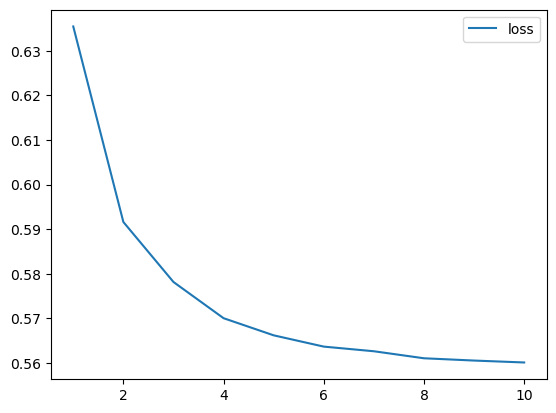

In [68]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

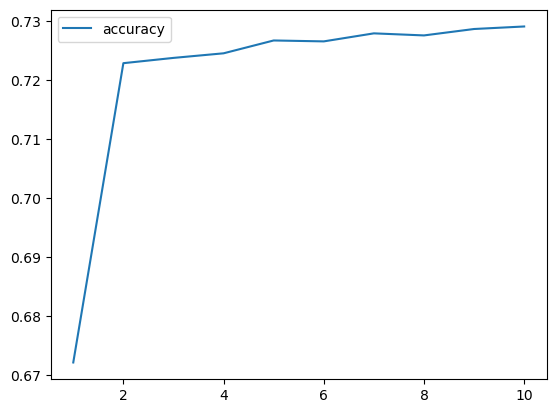

In [69]:
 # Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [70]:
# Export our model to HDF5 file
nn_model.save("AlphabetSoupCharity.h5")

In [71]:
# 2 iteration
# Create the Keras Sequential model
nn_model2 = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model2.add(tf.keras.layers.Dense(units=15, activation="relu", input_dim=len(X.columns)))

# Add in a second layer
nn_model2.add(tf.keras.layers.Dense(units=11, activation="tanh"))

# Add in a third layer
nn_model2.add(tf.keras.layers.Dense(units=7, activation="relu"))

# Add the output layer that uses a probability activation function
nn_model2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 15)                  │             660 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 11)                  │             176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 7)                   │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 928 (3.62 KB)

 Trainable params: 928 (3.62 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
# Compile the model
nn_model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [73]:
# Train the model
fit_model = nn_model2.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6716 - loss: 0.6260
Epoch 2/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7234 - loss: 0.5653
Epoch 3/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7299 - loss: 0.5562
Epoch 4/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 985us/step - accuracy: 0.7294 - loss: 0.5531
Epoch 5/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7311 - loss: 0.5497
Epoch 6/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7316 - loss: 0.5484
Epoch 7/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7317 - loss: 0.5483
Epoch 8/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7303 - loss: 0.5531
Epoch 9/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7314 - loss: 0.5474
Epoch 10/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7281 - loss: 0.5558


In [74]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 2ms/step - accuracy: 0.7280 - loss: 0.5543
Loss: 0.5543197989463806, Accuracy: 0.7280466556549072


In [75]:
# Export our model to HDF5 file
nn_model2.save("AlphabetSoupCharity_Optimization1.h5")

In [76]:
# 3 iteration
# Create the Keras Sequential model
nn_model3 = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model3.add(tf.keras.layers.Dense(units=19, activation="relu", input_dim=len(X.columns)))

# Add in a second layer
nn_model3.add(tf.keras.layers.Dense(units=13, activation="tanh"))

# Add in a third layer
nn_model3.add(tf.keras.layers.Dense(units=9, activation="tanh"))

# Add in a fourth layer
nn_model3.add(tf.keras.layers.Dense(units=5, activation="relu"))

# Add the output layer that uses a probability activation function
nn_model3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model3.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                     │ (None, 19)                  │             836 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 13)                  │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 9)                   │             126 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 5)                   │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,278 (4.99 KB)

 Trainable params: 1,278 (4.99 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
# Compile the model
nn_model3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [78]:
# Train the model
fit_model3 = nn_model3.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6443 - loss: 0.6387
Epoch 2/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7320 - loss: 0.5588
Epoch 3/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7247 - loss: 0.5562
Epoch 4/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7303 - loss: 0.5545
Epoch 5/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7299 - loss: 0.5521
Epoch 6/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7311 - loss: 0.5486
Epoch 7/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7322 - loss: 0.5485
Epoch 8/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7338 - loss: 0.5473
Epoch 9/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7329 - loss: 0.5468
Epoch 10/10
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7337 - loss: 0.5468


In [79]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 2ms/step - accuracy: 0.7282 - loss: 0.5547
Loss: 0.5546873211860657, Accuracy: 0.7281632423400879


In [80]:
# Export our model to HDF5 file
nn_model3.save("AlphabetSoupCharity_Optimization2.h5")

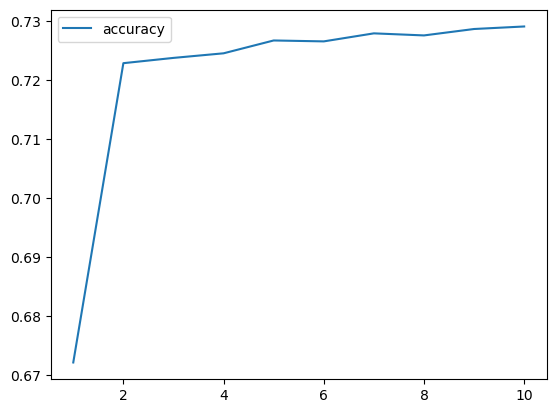

In [81]:
 # Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [82]:
# 3 iteration
from tensorflow.keras.layers import LeakyReLU
# Create the Keras Sequential model
nn_model4 = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model4.add(tf.keras.layers.Dense(units=111, activation="relu", input_dim=len(X.columns)))

# # Add in a second layer
nn_model4.add(tf.keras.layers.Dense(units=61, activation="elu"))
# nn_model4.add(tf.keras.layers.Dropout(0.5))  # 50% dropout rate

# Add in a third layer
nn_model4.add(tf.keras.layers.Dense(units=31, activation="sigmoid"))
# nn_model4.add(tf.keras.layers.Dropout(0.5))  # 50% dropout rate

# # Add in a fourth layer
nn_model4.add(tf.keras.layers.Dense(units=11, activation="sigmoid"))
# nn_model4.add(tf.keras.layers.Dropout(0.5))  # 50% dropout rate

# Add the output layer that uses a probability activation function
nn_model4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model4.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                     │ (None, 111)                 │           4,884 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 61)                  │           6,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 31)                  │           1,922 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 11)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,002 (54.70 KB)

 Trainable params: 14,002 (54.70 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:
# Compile the model
nn_model4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [84]:
# Train the model
fit_model4 = nn_model4.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6676 - loss: 0.6188
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7270 - loss: 0.5618
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7298 - loss: 0.5580
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7358 - loss: 0.5472
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7329 - loss: 0.5479
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7367 - loss: 0.5455
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7394 - loss: 0.5404
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7357 - loss: 0.5461
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7374 - loss: 0.5446
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7330 - loss: 0.5454
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7384 - loss: 0.5431
Epoch 12/100
804/804 ━━━━━━━━━━━━━━━━━━━━

In [85]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 2ms/step - accuracy: 0.7294 - loss: 0.5591
Loss: 0.5590725541114807, Accuracy: 0.7294460535049438


In [86]:
# Export our model to HDF5 file
nn_model4.save("AlphabetSoupCharity_Optimization3.h5")

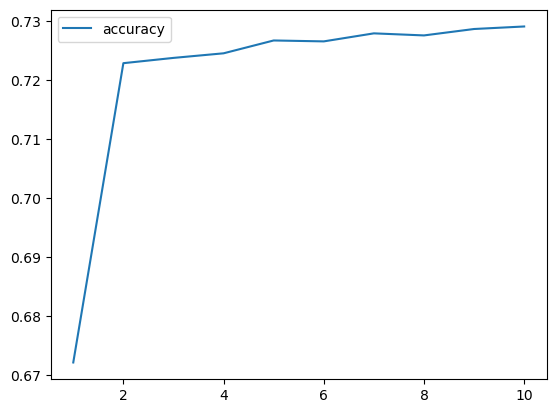

In [87]:
 # Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [88]:
from sklearn.metrics import accuracy_score
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest model accuracy: 0.713
